In [ ]:
"""
Cording Plan
スコアを元の情報で、分布の形をリサーチ

・生成画像点におけるスコアを見る。
・ある方向におけるスコアの変化を観察する。（対数スケール）
  ・差と内積
  （1/1000付近の関数が二次関数に近い（スコアの変化が線形）なら、線形独立に点を取ればヘッセ行列になると。それが望ましい挙動）

"""

In [2]:
%cd /content/drive/MyDrive/local_repo_all/Research_repo

/content/drive/MyDrive/local_repo_all/Research_repo


In [3]:
"""moduleのパス追加"""
import sys
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my-submodule')
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my_modules')

In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

from configs.main_config import load_config
from sde import VPSDE
from run import score_fn


"""機器の設定"""
config = load_config()
#torch.manual_seed(3407)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'what is device: {device}')
config['device'] = device   # 取得したデバイスをconfig に追加。ファイルの書き換えはない。

torch.backends.cudnn.bechmark = True    # ベンチマークモードオン 最適化してくれて高速化するらしい。

data_path = os.path.join(os.getcwd(),"Data_tobe_loaded", "x0_sample.pt")
model_path = os.path.join(os.getcwd(),"Data_tobe_loaded", "trained_model.pt")

sde = VPSDE(config)

"""Model_Load"""
model = torch.load(model_path)

"""Data_Load"""
x0 = (torch.load(data_path)).to(config['device'])






what is device: cuda


In [5]:
np.set_printoptions(precision=2, suppress=True)
torch.set_printoptions(precision=2, sci_mode=False)

In [ ]:
t = torch.tensor([config['sde']['eps']], device=config['device'])
score_x0 = score_fn(x0, t, model, sde)
print(f'{x0.size()=}\n{t.size()=}')
print(f'{score_x0=}')

x0.size()=torch.Size([1, 3, 32, 32])
t.size()=torch.Size([1])
score_x0=tensor([[[[    95.40,   -182.91,    -35.54,  ...,   -398.77,    172.09,
               95.15],
          [  -388.86,    413.41,   -174.22,  ...,    598.77,    -63.90,
             -291.38],
          [   355.42,   -495.36,    406.51,  ...,   -496.89,    134.53,
              263.27],
          ...,
          [   589.80,   -314.41,    275.32,  ...,   -420.26,    339.16,
              -83.02],
          [  -542.32,    277.44,   -410.05,  ...,    534.72,   -273.38,
             -158.38],
          [   302.51,   -287.37,    320.45,  ...,   -363.70,     93.28,
              106.76]],

         [[  -360.54,    426.25,   -255.10,  ...,    515.15,   -114.64,
             -249.04],
          [   559.62,   -613.89,    555.52,  ...,   -780.57,    314.67,
              195.26],
          [  -330.80,    718.67,   -572.88,  ...,    991.36,   -172.86,
             -212.13],
          ...,
          [  -436.61,     73.73,   -212.99

In [ ]:
"""load_x1"""
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/perx/plural_per100.pth'
x1_100 = torch.load(tensor_path)
x1 = torch.unsqueeze(x1_100[0], 0)

In [ ]:
t = torch.tensor([1/1000], device=config['device'])
print(f'{x1.size()=}\n{t.size()=}')
score_x1 = score_fn(x1, t, model, sde)
print(f'{score_x1=}')

x1.size()=torch.Size([1, 3, 32, 32])
t.size()=torch.Size([1])
score_x1=tensor([[[[  11.22,   11.69,   -4.20,  ..., -145.91,   -9.32,   55.85],
          [ -68.15,   25.79,  -36.40,  ...,  133.29,   37.81,  -51.50],
          [  13.20,  -68.84,   74.31,  ...,  -77.72,   17.94,   37.40],
          ...,
          [  97.45,  -26.53,   65.09,  ...,  -78.42,   87.13,   -3.45],
          [ -63.26,   60.68, -138.76,  ...,   98.74,  -59.32,   -5.45],
          [  32.72,  -42.82,   68.18,  ...,  -76.74,  -26.50,    5.78]],

         [[ -70.95,   78.35,  -30.17,  ...,  163.61,   56.03, -103.18],
          [ 138.25, -102.34,   77.28,  ..., -262.94,   22.88,   23.25],
          [ -47.54,  129.99, -116.63,  ...,  250.63,  -26.53, -141.49],
          ...,
          [ -93.10,  -76.17,  -32.34,  ...,  -44.66,   92.60,  -96.26],
          [  57.07,   -4.17,  123.06,  ...,  -72.91,   79.03,   51.11],
          [ -11.28,   27.39,  -55.31,  ...,   43.25,  -33.25,   20.26]],

         [[  49.01, -140.54,   

In [ ]:
# @title ユークリッド距離 Example

# ベクトルx1とx2を作成します。
# ここでは、ランダムな値を使用していますが、実際の値に置き換えてください。
x1 = torch.randn(3072)
x2 = torch.randn(3072)

# ユークリッド距離を計算します。
euclidean_distance = torch.dist(x1, x2)

print(f'Euclidean Distance: {euclidean_distance.item()}')

In [ ]:
#@title コサイン類似度 Example
x1 = torch.randn(3072)
x2 = torch.randn(3072)
x1 = x1.unsqueeze(0)
x2 = x2.unsqueeze(0)
cos_sim = F.cosine_similarity(x1, x2)
print(f'Cosine Similarity: {cos_sim.item():.3f}')

Cosine Similarity: 0.047


In [ ]:
"""比較したい vector の用意"""
input1 = torch.unsqueeze(torch.flatten(score_x0), 0)
input2 = torch.unsqueeze(torch.flatten(score_x1), 0)
print(f'{input1.size()=}\n{input2.size()=}')

input1.size()=torch.Size([1, 3072])
input2.size()=torch.Size([1, 3072])


In [ ]:
"""ユークリッド距離"""
euclidean_distance = torch.dist(input1, input2)
print(f'{euclidean_distance.item()=:.3f}')

euclidean_distance.item()=12648.102


In [ ]:
"""コサイン類似度"""
cos_sim = F.cosine_similarity(input1, input2)
print(f'{cos_sim.item()=:.3f}')

cos_sim.item()=0.869


In [ ]:
"""時刻tにおける分布ρ(x, t) のスコア(grad ∇ρ)の観察"""

In [22]:
x0 = (torch.load(data_path)).to(config['device'])

tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/perx/plural_per100.pth'
x1_100 = torch.load(tensor_path)
x1 = torch.unsqueeze(x1_100[0], 0)

x_ls = []
x_ls.append(x0)
x_ls.append(x1)

t = torch.tensor([1/1000], device=config['device'])

In [23]:
print(f'{x1.size()=}')

x1.size()=torch.Size([1, 3, 32, 32])


In [ ]:
"""
score を出すための x は [1, 3, 32, 32]
unsqueeze, flatten するのは cos_sim で。
"""

In [24]:
deff_vec = (x1 - x0)

In [31]:
score_ls = []
for i in range(10):
  if i>1:
    x_ls.append(x_ls[i-1] + deff_vec) # x[i]
  score_ls.append(torch.unsqueeze(torch.flatten(score_fn(x_ls[i], t, model, sde)), 0))

In [32]:
print(f'{len(score_ls)}')

10


In [40]:
cos_sim_score_ls = []
for i in range(9):
  cos_sim_score_ls.append(F.cosine_similarity(score_ls[0], score_ls[i+1]).item())

print(f'{cos_sim_score_ls=}')

cos_sim_score_ls=[0.9538221955299377, 0.8602359294891357, 0.7683286666870117, 0.6872908473014832, 0.6183894872665405, 0.5590966939926147, 0.5077589154243469, 0.46323996782302856, 0.4246424436569214]


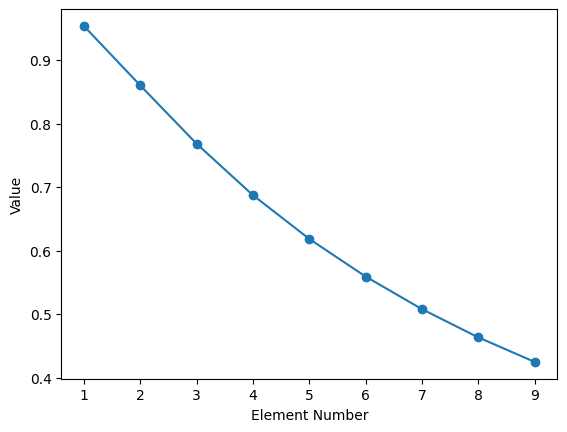

In [41]:
fig, ax = plt.subplots()

ax.plot(range(1, len(cos_sim_score_ls) + 1), cos_sim_score_ls, marker='o')

# 軸のラベル
ax.set_xlabel('Element Number')
ax.set_ylabel('Value')

# グラフの表示
plt.show()


In [ ]:
"""Forward過程 x0を元にしたmean, stdの変化観察"""

In [ ]:
t = torch.tensor([])